In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

sns.set_style("darkgrid")

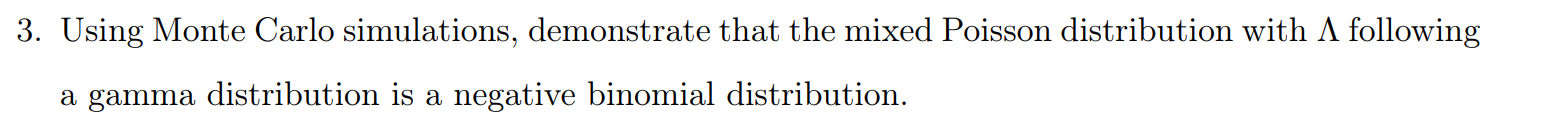

## Mixed Poisson Distribution

A **Mixed Poisson Distribution** extends the standard Poisson distribution by allowing its rate parameter $\lambda$ to be random instead of fixed. This makes it more flexible in modeling count data with extra variability.

### Definition
If $\Lambda$ is a random variable with distribution $G(\lambda)$, and $X$ follows a Poisson distribution with rate $\lambda$ conditional on $\Lambda = \lambda$, then $X$ follows a mixed Poisson distribution. Formally:

$$
    X \mid \Lambda = \lambda \sim \text{Poisson}(\lambda)
$$

The overall probability mass function (PMF) of $X$ is:

$$
    P(X = x) = \int_0^\infty \frac{\lambda^x e^{-\lambda}}{x!} \, dG(\lambda)
$$

where $x = 0, 1, 2, \dots$, and $G(\lambda)$ is the cumulative distribution function (CDF) of $\Lambda$.

### Key Idea
Unlike the standard Poisson distribution, where $\lambda$ is fixed, here $\lambda$ changes according to a distribution. This allows the model to handle overdispersion (variance larger than the mean), which the standard Poisson distribution cannot.

### Examples of Mixing Distributions
1. **Gamma Distribution**: If $\Lambda \sim \text{Gamma}(\alpha, \beta)$, then $X$ follows a **Negative Binomial Distribution**.

2. **Discrete Distributions**: $\Lambda$ can also take discrete values with certain probabilities.

### Applications
Mixed Poisson distributions are useful in:
- **Insurance**: Modeling claim counts with varying claim rates.
- **Epidemiology**: Analyzing outbreaks with different infection rates across regions.
- **Econometrics**: Modeling purchase counts in customer behavior studies.

### Summary
The mixed Poisson distribution allows the rate parameter $\lambda$ to vary, offering a more flexible way to model count data with extra variability, such as overdispersion, that the standard Poisson model cannot handle.


In [104]:
def poisson_culminative_gamma(n, alpha, beta):
    
    lambdas = ss.gamma.rvs(alpha, scale = 1/beta, size=n)
    mixed_poisson_rvs = ss.poisson.rvs(lambdas)
    
    return mixed_poisson_rvs


def empirical_cdf(data):

    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    y = np.arange(1, n + 1) / n
    
    return sorted_data, y

In [143]:
mp_hist = []
nb_hist = []
mp_cdf = []
nb_cdf = []

alpha_list = [2, 3, 5]
beta_list = [1/2, 1, 2]

for alpha in alpha_list:
    for beta in beta_list:
        mp = poisson_culminative_gamma(100000, alpha, beta)
        mp_hist.append(mp)
        mp_cdf.append(empirical_cdf(mp))
        
        #nb = ss.nbinom.rvs(alpha, beta/(1+beta), size=100000)
        mp_mean = np.mean(mp)
        mp_var = np.var(mp)
        
        nb = ss.nbinom.rvs((mp_mean**2)/(mp_var - mp_mean), mp_mean/mp_var, size=100000)
        nb_hist.append(nb)
        nb_cdf.append(empirical_cdf(nb))


For alpha = 2 and beta = 0.5 p value of KS test is 0.9826173134742929


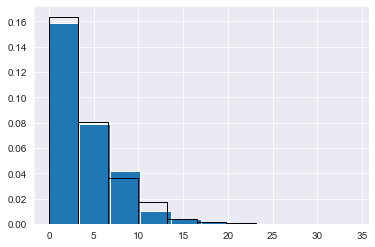

For alpha = 2 and beta = 1 p value of KS test is 0.8730264346621315


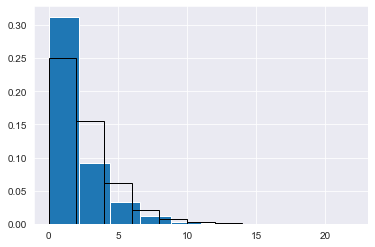

For alpha = 2 and beta = 2 p value of KS test is 0.9963233232792867


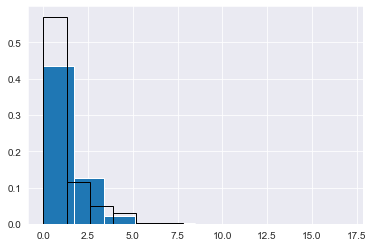

For alpha = 3 and beta = 0.5 p value of KS test is 0.6613890078874948


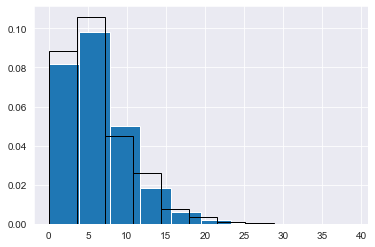

For alpha = 3 and beta = 1 p value of KS test is 0.9709914438236634


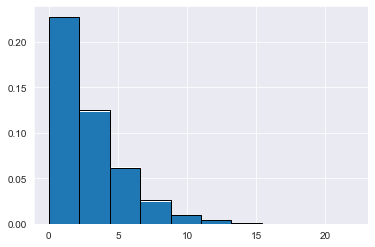

For alpha = 3 and beta = 2 p value of KS test is 0.8701361499165012


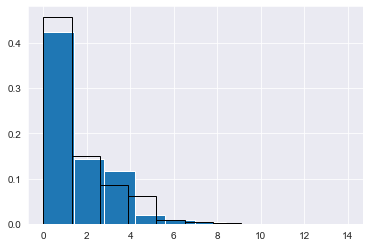

For alpha = 5 and beta = 0.5 p value of KS test is 0.9950689931032587


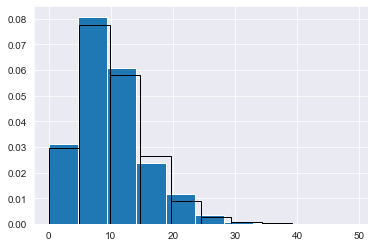

For alpha = 5 and beta = 1 p value of KS test is 0.5168926284892701


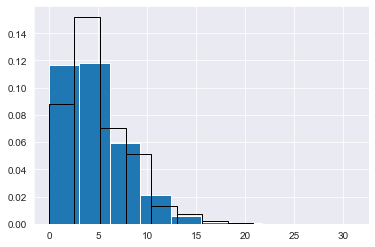

For alpha = 5 and beta = 2 p value of KS test is 0.7862984275918812


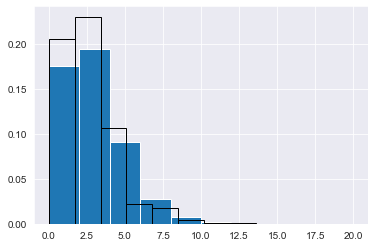

In [144]:
#ks test
for i in range(9):
    print(f'For alpha = {alpha_list[i//3]} and beta = {beta_list[i%3]} p value of KS test is {ss.kstest(mp_hist[i], nb_hist[i]).pvalue}')
    plt.hist(mp_hist[i], density=True)
    plt.hist(nb_hist[i], bins=10, edgecolor='black', facecolor='none', density=True)
    plt.show()

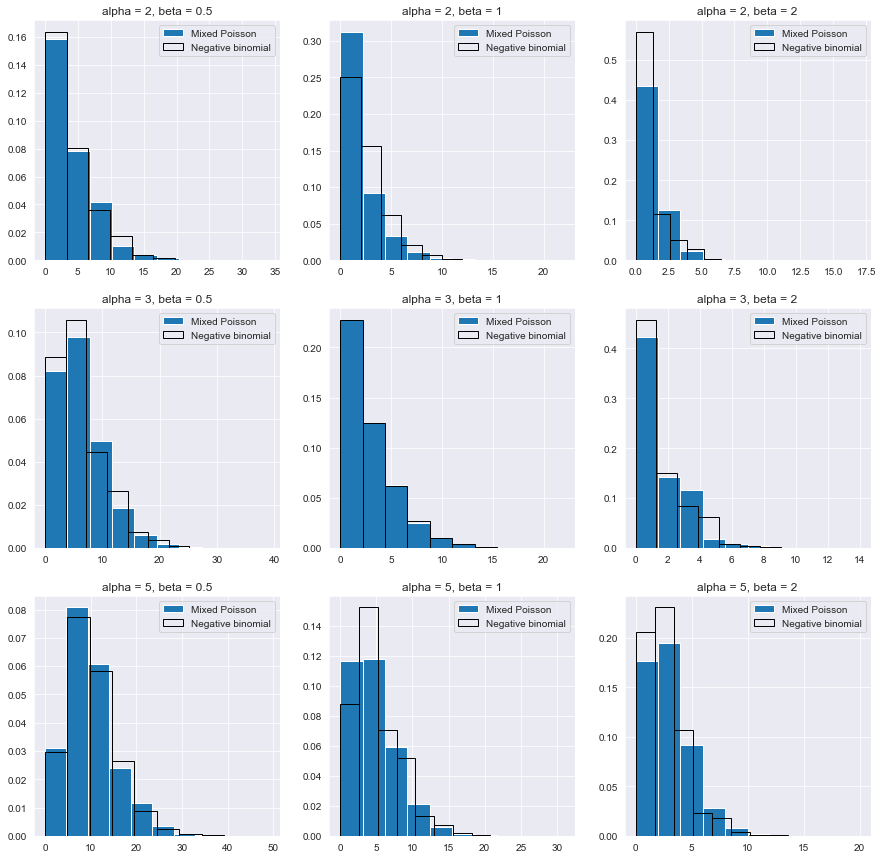

In [145]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

i = 0
for r in range(3):
    for c in range(3):
        ax[r,c].hist(mp_hist[i], bins=10, density=True, label='Mixed Poisson')
        ax[r,c].hist(nb_hist[i], bins=10, edgecolor='black', facecolor='none', density=True, label="Negative binomial")
        ax[r,c].legend()
        ax[r,c].set_title(f'alpha = {alpha_list[r]}, beta = {beta_list[c]}')
        i += 1

In [98]:
for i in mp_hist:
    print(f'mean: {np.mean(i)}, var: {np.var(i)}')

mean: 4.00223, var: 11.973165027099997
mean: 1.98628, var: 3.9440717615999996
mean: 0.99753, var: 1.5029438990999997
mean: 5.9984, var: 17.972737440000003
mean: 3.00444, var: 6.0365402864
mean: 1.50595, var: 2.2452045975
mean: 9.98643, var: 30.0530258551
mean: 4.99235, var: 9.9934714775
mean: 2.50406, var: 3.7612835164000007


In [99]:
for i in nb_hist:
    print(f'mean: {np.mean(i)}, var: {np.var(i)}')

mean: 3.99203, var: 11.943326479100001
mean: 2.0059, var: 4.000625189999999
mean: 0.99996, var: 1.4937799984000004
mean: 5.99333, var: 17.839925511099995
mean: 3.00194, var: 6.089636236399999
mean: 1.49861, var: 2.2347180679
mean: 10.0161, var: 30.05714079
mean: 4.97784, var: 9.906408934400002
mean: 2.49766, var: 3.7404745244


In [75]:
mp_hist

[array([1, 3, 1, ..., 5, 3, 0]),
 array([3, 1, 1, ..., 0, 1, 1]),
 array([0, 0, 1, ..., 0, 1, 4]),
 array([ 6,  7, 10, ...,  8,  3,  4]),
 array([3, 9, 1, ..., 0, 1, 2]),
 array([2, 1, 0, ..., 4, 0, 0]),
 array([17,  6, 15, ...,  6, 11, 11]),
 array([7, 8, 6, ..., 7, 7, 5]),
 array([10,  0,  1, ...,  2,  8,  2])]